# Morphological Transformation

### We will learn different morphological operations like Erosion, Dilation, Opening, Closing etc.


Reference: https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

## Theory
Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs **two inputs**, one is our original image, **second one is called structuring element or kernel** which decides the nature of operation. Two basic morphological operators are
- Erosion and
- Dilation.

Then its variant forms like Opening, Closing, Gradient etc also comes into play.

We will see them one-by-one with help of following image:

![image](assets/j.png)

## EROSION

- The kernel slides through the image (as in 2D convolution).
- A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1,
- otherwise it is eroded (made to zero).

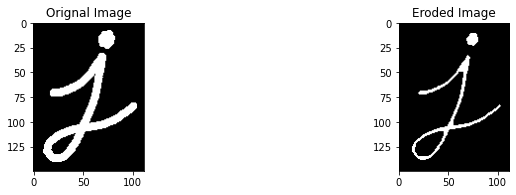

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
img = cv.imread('assets/j.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)

plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Orignal Image')
plt.subplot(222), plt.imshow(erosion, cmap='gray'), plt.title('Eroded Image')
plt.show()

## DILATION

- Here, a pixel element is '1' if at least one pixel under the kernel is '1'.
- So it increases the white region in the image or size of foreground object increases.

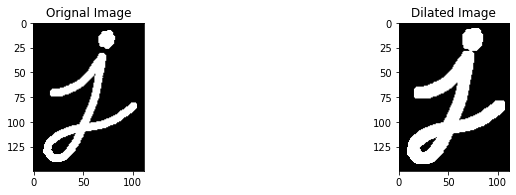

In [ ]:
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 1)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Orignal Image')
plt.subplot(222), plt.imshow(dilation, cmap='gray'), plt.title('Dilated Image')
plt.show()

## OPENING

- Errosion Followed by Dilation
- Normally, in cases like noise removal, erosion is followed by dilation.
- Erosion removes white noises, but it also shrinks our object.
- So we dilate it. (Meaning we increse the area of foreground image).
- Since noise is gone, they won't come back, but our object area increases.

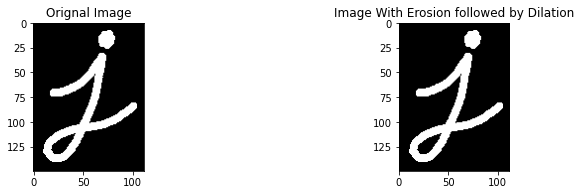

In [ ]:
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Orignal Image')
plt.subplot(222), plt.imshow(opening, cmap='gray'), plt.title('Image With Erosion followed by Dilation')
plt.show()

## CLOSING

- Closing is reverse of Opening, Dilation followed by Erosion.
- useful in closing small holes inside the foreground objects, or small black points on the object.

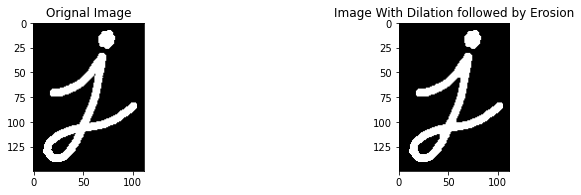

In [ ]:
kernel = np.ones((3,3),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Orignal Image')
plt.subplot(222), plt.imshow(closing, cmap='gray'), plt.title('Image With Dilation followed by Erosion')
plt.show()

## Morphological Gradient

It is the difference between dilation and erosion of an image.

We will get the outline of the object.

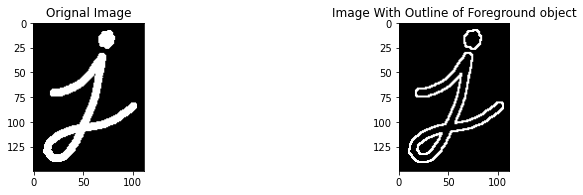

In [ ]:
kernel = np.ones((3,3),np.uint8)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Orignal Image')
plt.subplot(222), plt.imshow(gradient, cmap='gray'), plt.title('Image With Outline of Foreground object')
plt.show()

## Top Hat

It is the difference between input image and Opening of the image.

Lets try with different kernels.

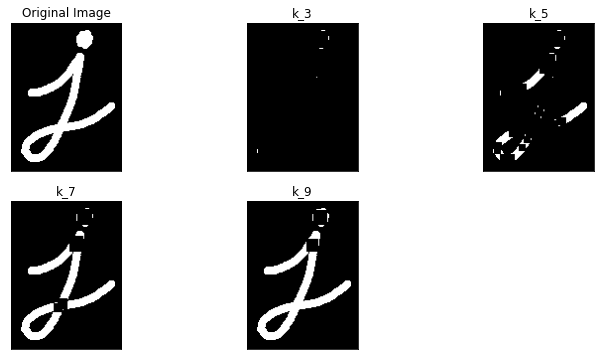

In [ ]:
k = [5,7,9,11]
tophat = []
for i in range(len(k)):
    kernel = np.ones((k[i],k[i]),np.uint8)
    tophat.append(cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel))

titles = ['Original Image','k_3', 'k_5', 'k_7', 'k_9']
images = [img] + tophat

plt.figure(figsize=(12, 6))
for i in range(len(titles)):
    plt.subplot(2,3,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## Black Hat

It is the difference between the closing of the input image and input image.

Lets try with different kernels.

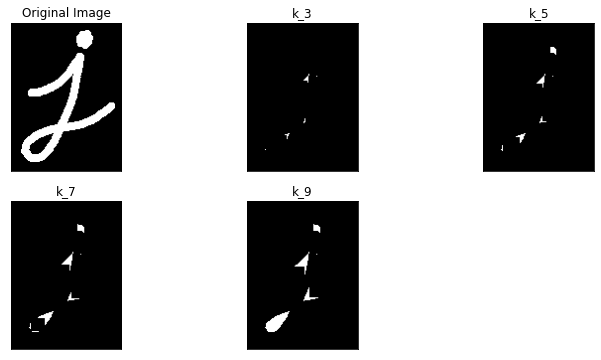

In [ ]:
k = [5,7,9,11]
blackhat = []
for i in range(len(k)):
    kernel = np.ones((k[i],k[i]),np.uint8)
    blackhat.append(cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel))

titles = ['Original Image','k_3', 'k_5', 'k_7', 'k_9']
images = [img] + blackhat

plt.figure(figsize=(12, 6))
for i in range(len(titles)):
    plt.subplot(2,3,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# ASSIGNMENT (20 POINTS)

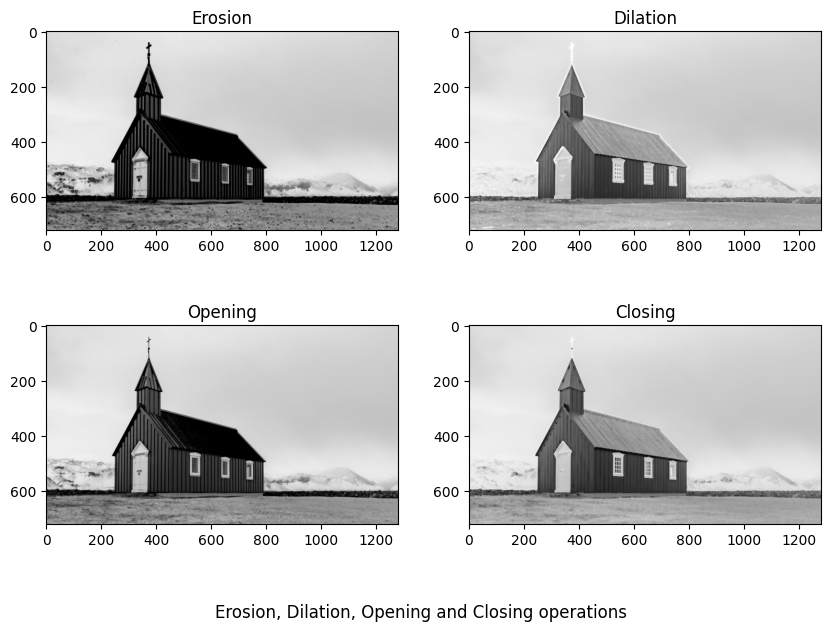

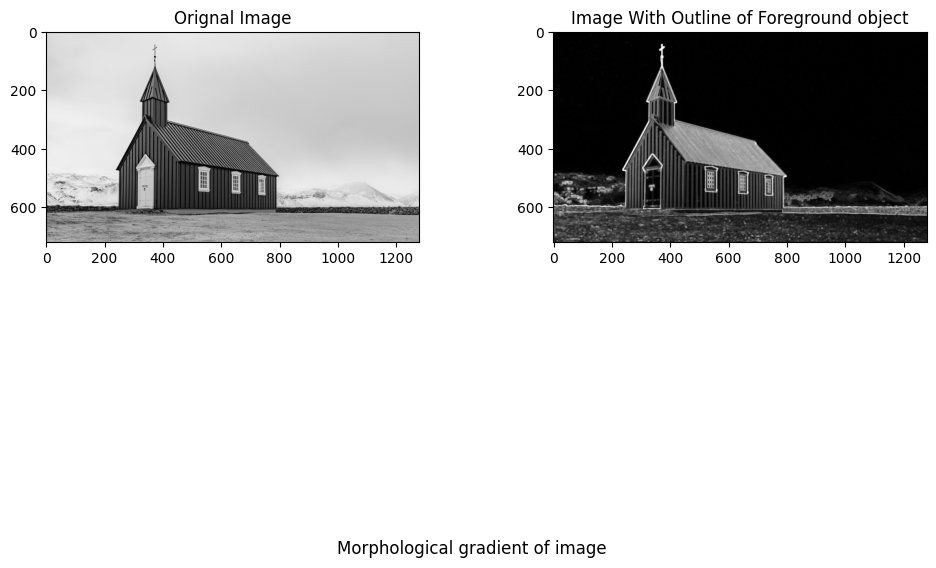

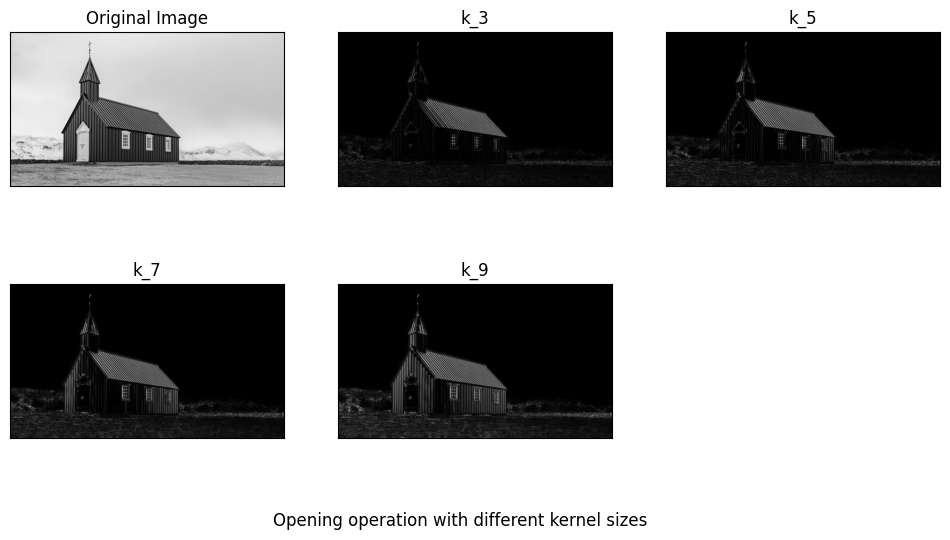

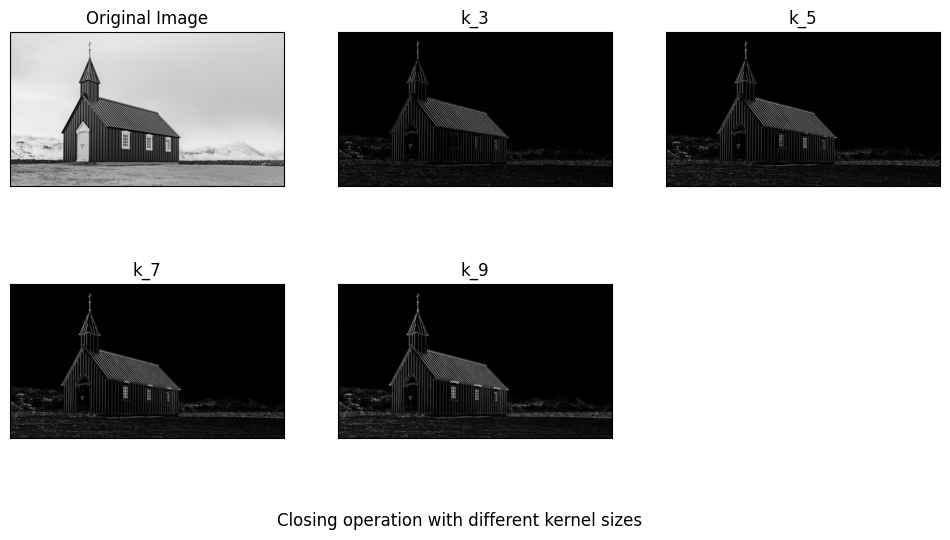

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
img = cv.imread('assets/church.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Convert the image from BGR to RGB (opencv loads in BGR format)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Step 2: Define a kernel for morphological operations
kernel = np.ones((5,5), np.uint8)

# Step 3: Apply morphological operations
erosion = cv.erode(img, kernel, iterations=1)
dilation = cv.dilate(img, kernel, iterations=1)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

# Step 4: Visualize the results
fig = plt.figure(figsize=(10, 7))
plt.subplot(221), plt.imshow(erosion, cmap='gray'), plt.title('Erosion')
plt.subplot(222), plt.imshow(dilation, cmap='gray'), plt.title('Dilation')
plt.subplot(223), plt.imshow(opening, cmap='gray'), plt.title('Opening')
plt.subplot(224), plt.imshow(closing, cmap='gray'), plt.title('Closing')
fig.text(0.5, 0.01, "Erosion, Dilation, Opening and Closing operations", ha='center', fontsize=12)
plt.show()

# Step 5: USE THE DIFFERENT KERNELS TO VISUALIZE AND DISCUSS THE OUTPUT

gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

fig = plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Orignal Image')
plt.subplot(222), plt.imshow(gradient, cmap='gray'), plt.title('Image With Outline of Foreground object')
fig.text(0.5, 0.01, "Morphological gradient of image", ha='center', fontsize=12)
plt.show()

k = [5,7,9,11]
tophat = []
for i in range(len(k)):
    kernel = np.ones((k[i],k[i]),np.uint8)
    tophat.append(cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel))

titles = ['Original Image','k_3', 'k_5', 'k_7', 'k_9']
images = [img] + tophat

fig = plt.figure(figsize=(12, 6))
for i in range(len(titles)):
    plt.subplot(2,3,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
fig.text(0.5, 0.01, "Opening operation with different kernel sizes", ha='center', fontsize=12)
plt.show()

blackhat = []
for i in range(len(k)):
    kernel = np.ones((k[i],k[i]),np.uint8)
    blackhat.append(cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel))

titles = ['Original Image','k_3', 'k_5', 'k_7', 'k_9']
images = [img] + blackhat

fig = plt.figure(figsize=(12, 6))
for i in range(len(titles)):
    plt.subplot(2,3,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
fig.text(0.5, 0.01, "Closing operation with different kernel sizes", ha='center', fontsize=12)
plt.show()

## Discussion

When applying morphological transformations, the resulting image's brightness can vary depending on the kernel size, especially in opening and closing operations.

In the case of opening, the results tend to be darker with smaller kernels. As the kernel size increases, the darkness decreases, leading to a lighter image. This is because smaller kernels remove less of the foreground elements, leaving behind more of the original image's darker regions. As the kernel grows, more of these elements are removed, resulting in less darkening.

Conversely, closing operations produce the opposite effect. With a small kernel, the image remains relatively light, but as the kernel size increases, the image darkens. This happens because larger kernels fill in gaps and connect regions more aggressively, leading to an overall darkening effect as more of the lighter areas are filled in or covered.